# Shotplot Archery Shot Analyzer
Shotplot reads an image of a used target and processes it over several steps to derive a position and score for each shot. It currently only recognizes the popular 'single spot' 10 ring target (see below for examples). The **target_reader** performs all processing and stores additional information, like output images from each processing stage.

### Table of Contents
* [1. Imports and Functions](#sec1)
* [2. Instantiate and Run Target Reader](#sec2)
* [3. Display Stage Images](#sec3)
* [4. Graph Shot Positions](#sec4)
* [5. Calculate Summary Statistics](#sec5)

<a id='sec1'></a>
### 1. Imports and Functions
* **target_reader**: Reads in an image of a used archery target and uses openCV to determine
    position and score value for each shot

In [1]:
import sys
import matplotlib.pyplot as plt

sys.path.append('./code')
from target_reader import target_reader

%matplotlib inline

<a id='sec2'></a>
### 2. Instantiate and Run Target Reader
I saved a few sample targets into the **sample_targets** directory. This cell processes one of those at a time.

In [2]:
# Sample range is 1-4
sample_num = 4
sample_file = f'flask/static/sample_targets/sample_{sample_num}.jpg'

tr = target_reader()
result = tr.run(sample_file)
if result:
    print('Failed:', result)
else:
    print('Success!')

Success!


<a id='sec3'></a>
### 3. Display Stage Images
Once an image is processed its various stages can be displayed by referencing the internal class variable storing them.

Original: 

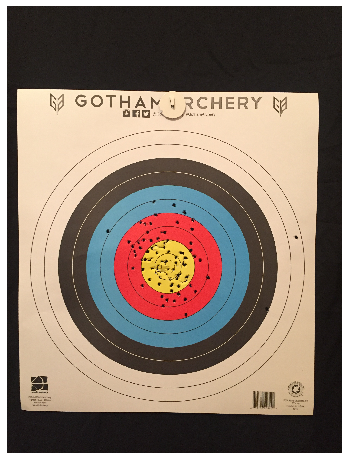

Perspective Corrected: 

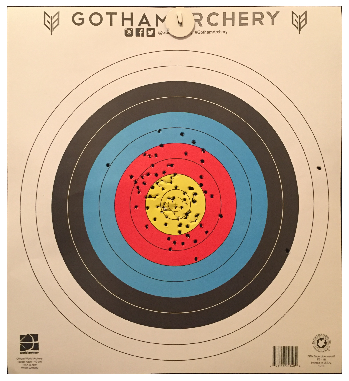

Standard Sized: 

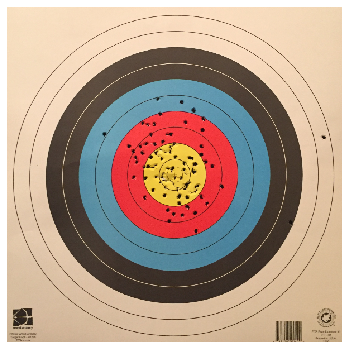

Contrast Adjusted: 

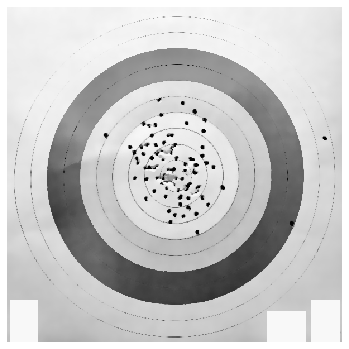

Blob Detection: 

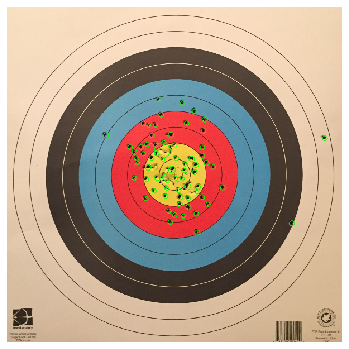

In [3]:
stage_names = [
    'Original',
    'Perspective Corrected',
    'Standard Sized',
    'Contrast Adjusted',
    'Blob Detection'
]
stage_images = [tr.orig_image] + tr.stage_images
for name,img in zip(stage_names, stage_images):
    print(f'{name}:', end=' ')
    if type(img) == type(None):
        print('None')
    else:
        plt.figure(figsize=(6,12))
        plt.axis('off')
        plt.imshow(img)
        plt.show();

<a id='sec4'></a>
### 4. Graph Shot Positions
The cell below makes a simple scatter plot of shot positions.

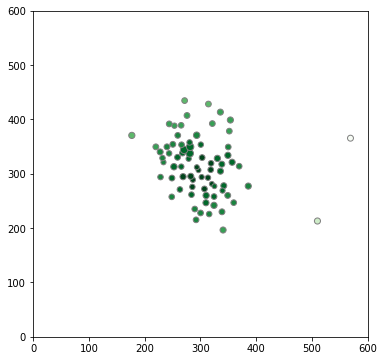

In [4]:
plt.figure(figsize=(6,6))
plt.xlim([0, tr.out_width])
plt.ylim([0, tr.out_width])
plt.scatter(tr.df.x,
            tr.out_width-tr.df.y,
            s=tr.df.radius*8,
            c=tr.df.score,
            cmap=plt.cm.Greens,
            edgecolors='gray');

<a id='sec5'></a>
### 5. Calculate Summary Statistics

In [5]:
print('Total Shots:', tr.df.shape[0])
print('Average Shot Score:', round(tr.df.score.mean(), 2))

Total Shots: 74
Average Shot Score: 8.3
